Feature engineering & EDA Project on Healthcare Dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

health_df = pd.read_csv(r"D:\ML Data\health_lifestyle_dataset.csv")
health_df.tail()

,id,age,gender,bmi,daily_steps,sleep_hours,water_intake_l,calories_consumed,smoker,alcohol,resting_hr,systolic_bp,diastolic_bp,cholesterol,family_history,disease_risk
99995,99996,53,Male,33.1,4726,3.9,2.0,3118,0,1,56,105,76,282,0,0
99996,99997,22,Male,35.1,11554,4.5,3.1,1967,0,0,51,149,77,192,0,0
99997,99998,37,Male,18.9,3924,3.8,1.0,2328,0,0,69,92,117,218,0,0
99998,99999,72,Female,27.8,16110,5.6,0.8,3093,0,0,93,164,72,188,0,0
99999,100000,37,Male,35.4,8222,9.1,1.8,3942,0,1,71,145,80,276,0,1


Basic Data Understanding

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Shape of dataset:", health_df.shape)
print("Column names:", health_df.columns.tolist())
print("Info:")
print(health_df.info())
print("Missing values per column:", health_df.isnull().sum())
print("Summary statistics:", health_df.describe())

Shape of dataset: (100000, 16)
Column names: ['id', 'age', 'gender', 'bmi', 'daily_steps', 'sleep_hours', 'water_intake_l', 'calories_consumed', 'smoker', 'alcohol', 'resting_hr', 'systolic_bp', 'diastolic_bp', 'cholesterol', 'family_history', 'disease_risk']
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 100000 non-null  int64  
 1   age                100000 non-null  int64  
 2   gender             100000 non-null  object 
 3   bmi                100000 non-null  float64
 4   daily_steps        100000 non-null  int64  
 5   sleep_hours        100000 non-null  float64
 6   water_intake_l     100000 non-null  float64
 7   calories_consumed  100000 non-null  int64  
 8   smoker             100000 non-null  int64  
 9   alcohol            100000 non-null  int64  
 10  resting_hr         100000 non-n

Univariate Analysis (EDA)



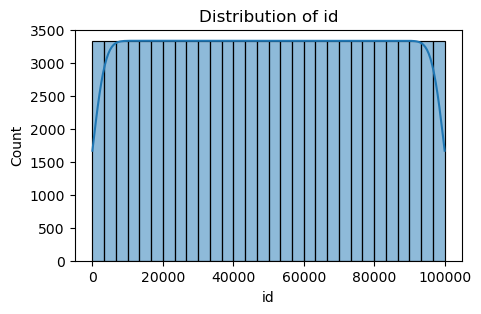

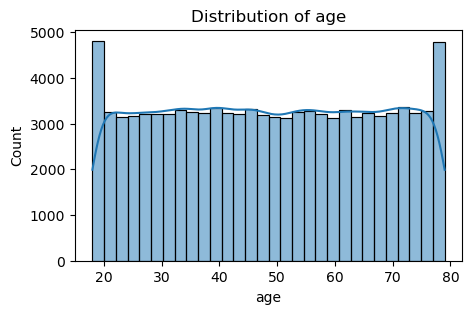

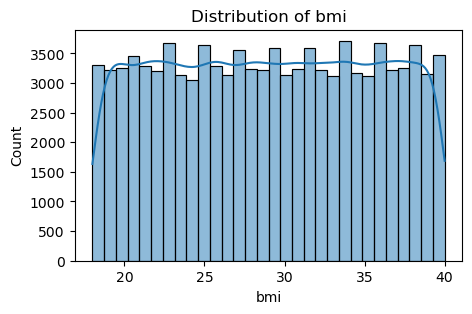

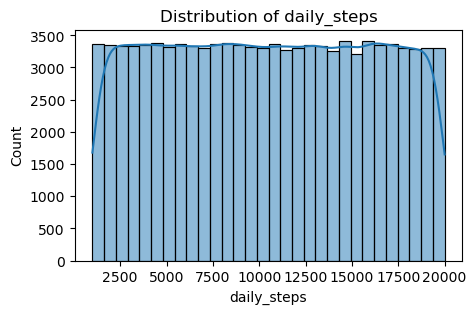

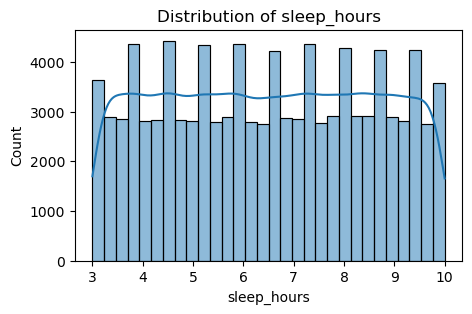

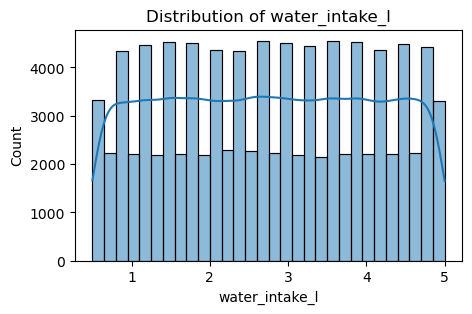

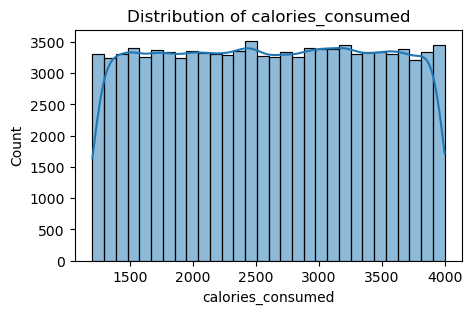

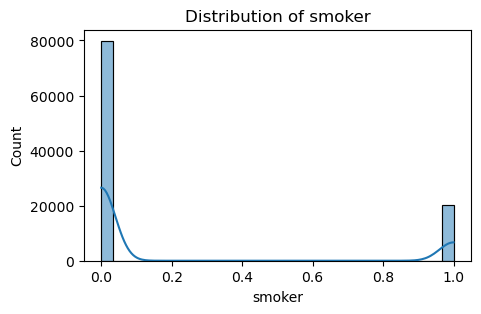

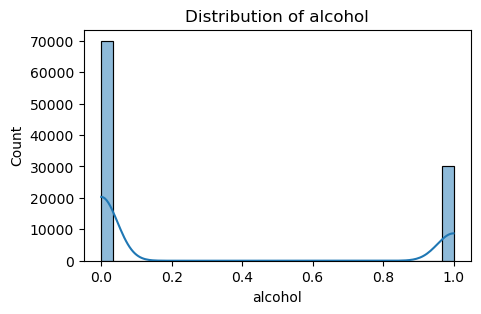

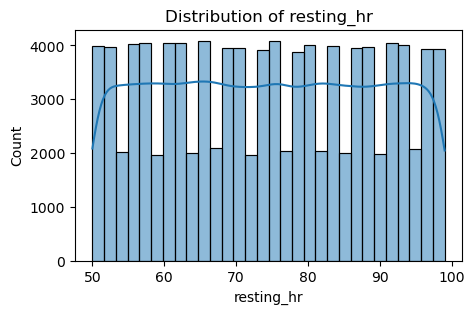

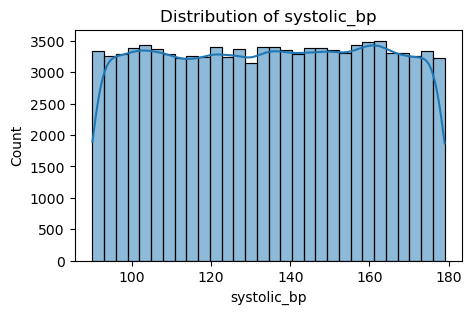

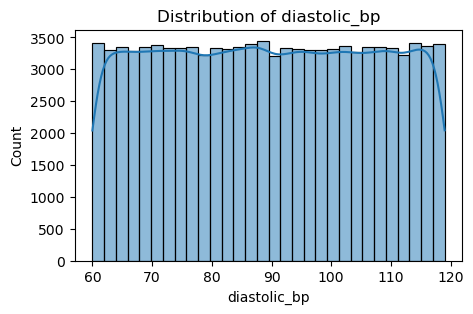

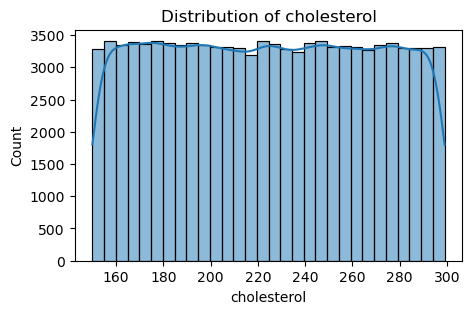

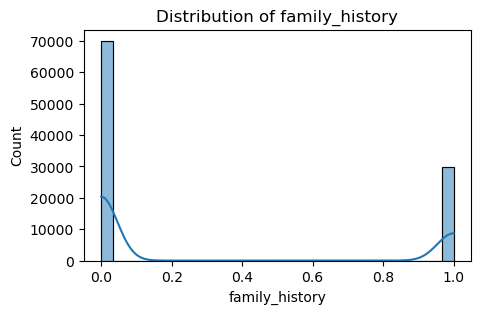

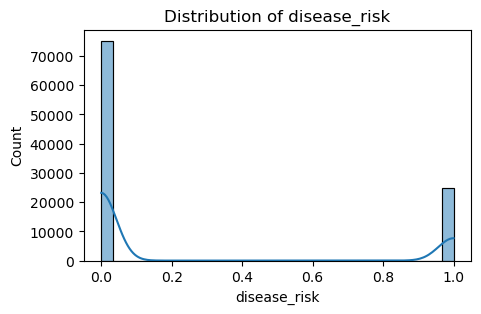

In [ ]:
## Numerical Features Distribution
num_cols = health_df.select_dtypes(include=[np.number]).columns
for col in num_cols:
    plt.figure(figsize=(5,3))
    sns.histplot(health_df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

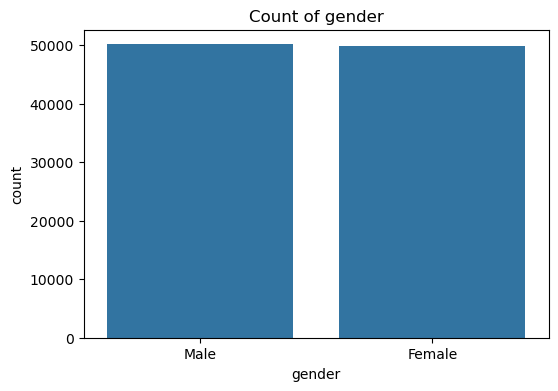

In [ ]:
#Categorical Features Countplot
cat_cols = health_df.select_dtypes(exclude=[np.number]).columns
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=health_df)
    plt.title(f"Count of {col}")
    plt.show()

 Bivariate Analysis

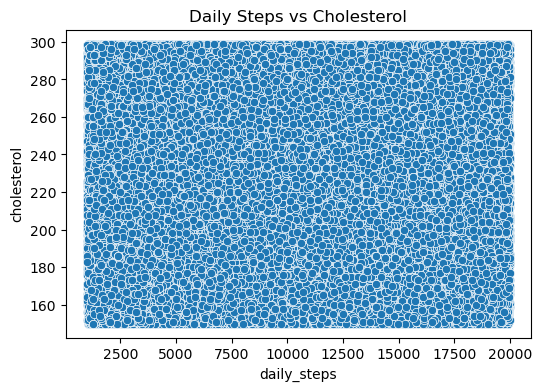

In [11]:
# Cholesterol vs Daily Steps (example)
if "cholesterol" in health_df.columns and "daily_steps" in health_df.columns:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x="daily_steps", y="cholesterol", data=health_df)
    plt.title("Daily Steps vs Cholesterol")
    plt.show()

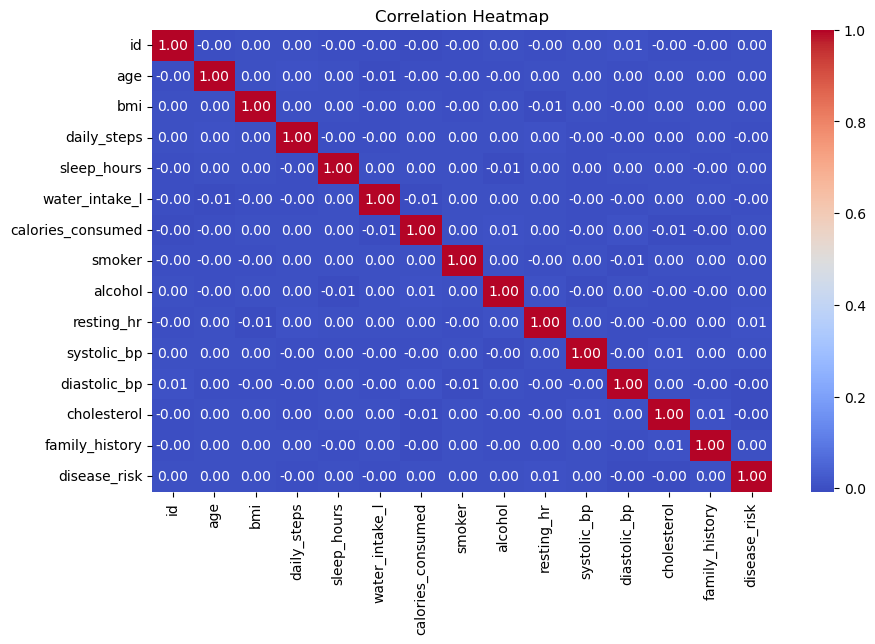

In [13]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(health_df.select_dtypes(include='number').corr(), 
            annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

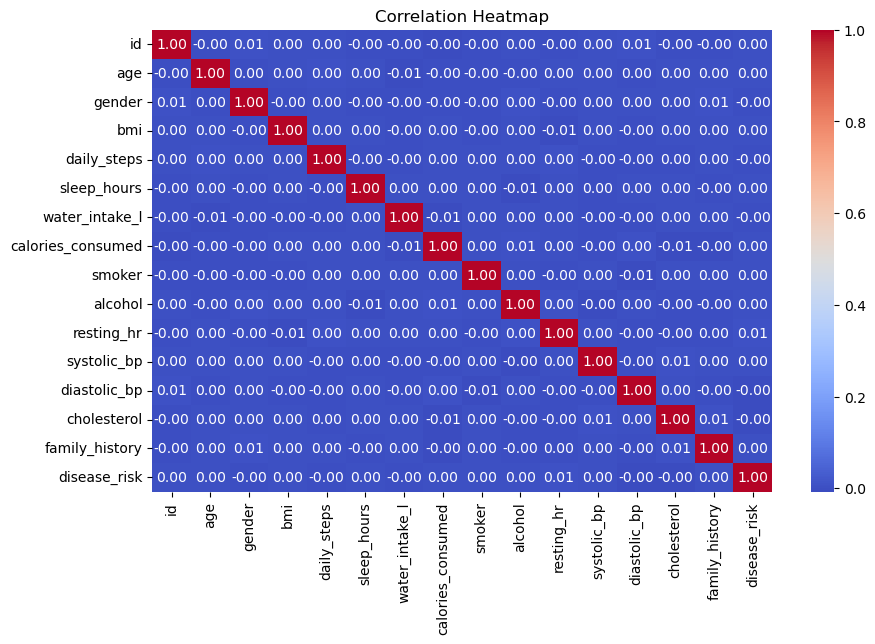

In [14]:
from sklearn.preprocessing import LabelEncoder

health_encoded = health_df.copy()
for col in health_encoded.select_dtypes(include='object').columns:
    health_encoded[col] = LabelEncoder().fit_transform(health_encoded[col])

plt.figure(figsize=(10,6))
sns.heatmap(health_encoded.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

 Feature Engineering

In [15]:
# Example: BMI Category
if "bmi" in health_df.columns:
    health_df["bmi_category"] = pd.cut(
        health_df["bmi"],
        bins=[0, 18.5, 24.9, 29.9, 100],
        labels=["Underweight", "Normal", "Overweight", "Obese"]
    )

# Example: High Blood Pressure Feature
if "systolic_bp" in health_df.columns and "diastolic_bp" in health_df.columns:
    health_df["high_bp"] = np.where((health_df["systolic_bp"] > 130) | 
                                    (health_df["diastolic_bp"] > 80), 1, 0)

# Example: Sleep Quality Feature
if "sleep_hours" in health_df.columns:
    health_df["sleep_quality"] = health_df["sleep_hours"].apply(
        lambda x: "Poor" if x < 6 else ("Good" if 6 <= x <= 8 else "Excellent")
    )

print("\nNew engineered features:", [col for col in ["bmi_category", "high_bp", "sleep_quality"] if col in health_df.columns])



New engineered features: ['bmi_category', 'high_bp', 'sleep_quality']
